### Multiple Linear Regression

Multiple Linear Regression: Involves multiple independent variables. 

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [103]:
# read dataset

data = pd.read_csv("employee_salary.csv")
data.head(5)

,Experience,Education,Age,Salary
0,7,15,29,92499.0
1,15,12,56,175001.0
2,11,12,19,120501.0
3,8,10,20,91999.0
4,7,12,54,102001.0


In [104]:
data.columns

Index(['Experience', 'Education', 'Age', 'Salary'], dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  100 non-null    int64  
 1   Education   100 non-null    int64  
 2   Age         100 non-null    int64  
 3   Salary      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [106]:
data.describe()

,Experience,Education,Age,Salary
count,100.000000,100.000000,100.000000,100.000000
mean,9.640000,13.530000,39.080000,119830.140000
std,5.296311,2.240378,13.134641,46532.081675
min,1.000000,10.000000,18.000000,34501.000000
25%,5.000000,12.000000,28.000000,82500.250000
50%,9.000000,14.000000,40.000000,114750.500000
75%,14.000000,15.250000,50.250000,157124.250000
max,19.000000,17.000000,63.000000,212500.000000


In [107]:
# Split the data into features and target variable

x = data.drop(columns=['Salary'])
y = data['Salary']
# x = x.values.reshape(-1, 3)
y = y.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
y

array([[ 92499.],
       [175001.],
       [120501.],
       [ 91999.],
       [102001.],
       [202000.],
       [124501.],
       [123502.],
       [ 70500.],
       [101999.],
       [ 67999.],
       [ 53499.],
       [149000.],
       [ 79000.],
       [ 51000.],
       [ 34501.],
       [150500.],
       [139501.],
       [193500.],
       [117503.],
       [179501.],
       [156499.],
       [161999.],
       [202000.],
       [147500.],
       [ 63501.],
       [ 73000.],
       [212500.],
       [ 84499.],
       [113498.],
       [ 91000.],
       [195501.],
       [ 74000.],
       [153999.],
       [187500.],
       [113500.],
       [ 56999.],
       [159000.],
       [ 97500.],
       [146499.],
       [104000.],
       [169501.],
       [ 51001.],
       [161001.],
       [187499.],
       [ 72499.],
       [186001.],
       [116001.],
       [ 74001.],
       [ 57504.],
       [ 93001.],
       [121501.],
       [ 79501.],
       [181001.],
       [136000.],
       [ 5

In [109]:
# shape
print('shape X_train :', X_train.shape)
print('shape y_train :', y_train.shape)
print('shape X_test :', X_test.shape)
print('shape y_test :', y_test.shape)

shape X_train : (80, 3)
shape y_train : (80, 1)
shape X_test : (20, 3)
shape y_test : (20, 1)


In [110]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
# Make predictions
y_pred = model.predict(X_test)

In [112]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 1.2829439582094637
R^2 Score: 0.9999999993183721
Coefficients: [[9000.01371815 1000.05901878  500.00842907]]
Intercept: [-0.96596127]


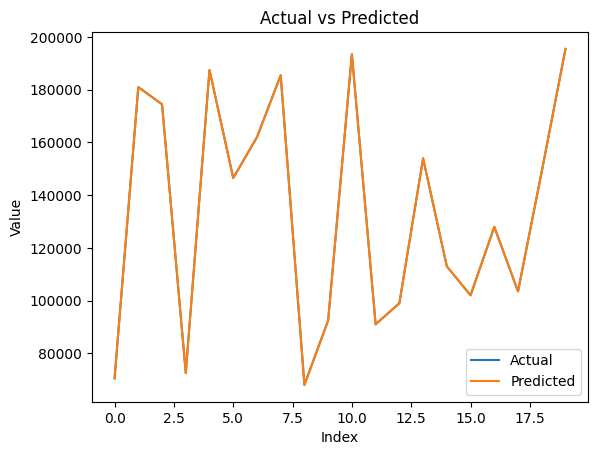

In [113]:
# Plotting the line chart
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
# Adding legend
plt.legend()
# Displaying the plot
plt.show()


save model

In [114]:
import pickle

with open('models/Model_MLR.pkl', 'wb') as f:
    pickle.dump(model, f)
    

Inference

In [115]:
import pickle
import numpy as np

with open("models/Model_MLR.pkl", "rb") as f:
    load_Model = pickle.load(f)

x_new = np.array([[2,15,25],[4,16,24],[7,15,35]])
# Perform inference
predictions = load_Model.predict(x_new)

print(predictions)


[[45500.15748348]
 [64000.23550949]
 [95500.31036496]]


c:\Users\nvish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
